<a href="https://colab.research.google.com/github/PikunMohanta/CC-FEB-DATA_SCIENCE/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.ensemble import RandomForestClassifier

In [3]:
import os
os.getcwd()

'/content'

In [4]:
data = pd.read_csv("/content/drive/MyDrive/CodeClause/creditcard.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.shape

(284807, 31)

In [7]:
#To Remove Duplicate Data
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(283726, 31)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
data.groupby('Class').Class.count()

Class
0    283253
1       473
Name: Class, dtype: int64

In [12]:
data.groupby('Class').Class.count() / len(data) *100

Class
0    99.83329
1     0.16671
Name: Class, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

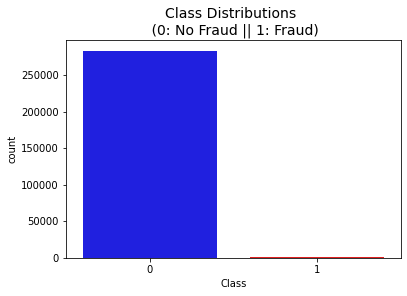

In [13]:
colors = ["Blue", "Red"]
sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

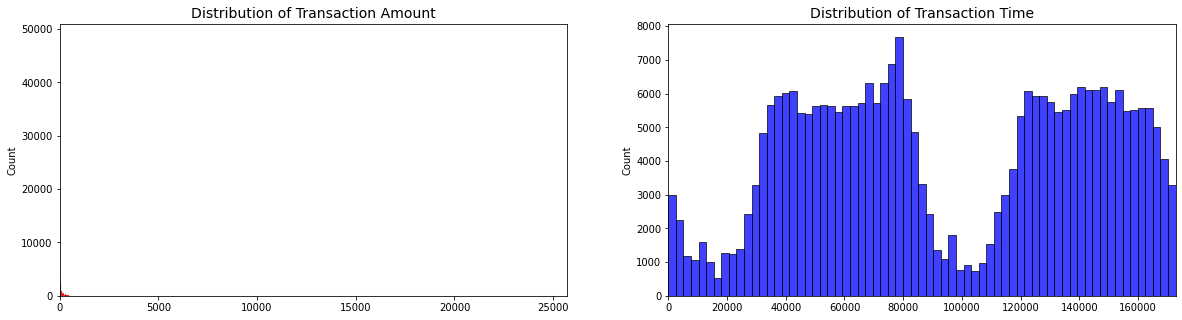

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [15]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [16]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [17]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
x = data.drop('Class', axis = 1).values
y = data['Class'].values

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

**K-Nearest Neighbors**

In [21]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(x_train, y_train)
knn_pred = KNN.predict(x_test)

In [22]:
knn_score=accuracy_score(y_test, knn_pred)
print(f'Accuracy score of the K-Nearest Neighbors model is {round(knn_score*100,2)}%')

Accuracy score of the K-Nearest Neighbors model is 99.85%


In [23]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_pred)))

F1 score of the K-Nearest Neighbors model is 0.022727272727272724


In [24]:
confusion_matrix(y_test, knn_pred, labels = [0, 1])

array([[56659,     0],
       [   86,     1]])

**Decision Tree**

In [25]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(x_train, y_train)
dt_pred = DT.predict(x_test)

In [26]:
dt_score=accuracy_score(y_test, dt_pred)
print(f'Accuracy score of the Decision Tree model is {round(dt_score*100,2)}%')

Accuracy score of the Decision Tree model is 99.93%


In [27]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_pred)))

F1 score of the Decision Tree model is 0.7643312101910829


In [28]:
confusion_matrix(y_test, dt_pred, labels = [0, 1])

array([[56649,    10],
       [   27,    60]])

**Logistic** Regression

In [29]:
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

In [30]:
lr_score=accuracy_score(y_test, lr_pred)
print(f'Accuracy score of the Logistic Regression model is {round(lr_score*100,2)}%')

Accuracy score of the Logistic Regression model is 99.91%


In [31]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_pred)))

F1 score of the Logistic Regression model is 0.6620689655172414


In [32]:
confusion_matrix(y_test, lr_pred, labels = [0, 1])

array([[56649,    10],
       [   39,    48]])

**Random** Forest

In [33]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [34]:
rf_score=accuracy_score(y_test, rf_pred)
print(f'Accuracy score of the Random Forest model is {round(rf_score*100,3)}%')

Accuracy score of the Random Forest model is 99.938%


In [35]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_pred)))

F1 score of the Random Forest model is 0.7741935483870969


In [36]:
confusion_matrix(y_test, rf_pred, labels = [0, 1])

array([[56651,     8],
       [   27,    60]])

In [37]:
accuracies = [knn_score, dt_score, lr_score, rf_score]
classifiers = ['KNN', 'DT', 'LR', 'RF']

<Figure size 792x792 with 0 Axes>

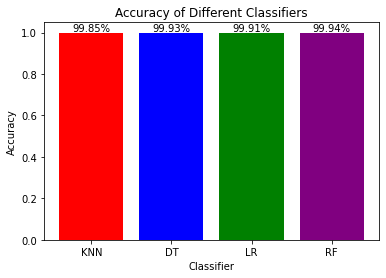

In [38]:
plt.figure(figsize=(11,11))
colors_list =['Red','Blue','Green','Purple']
fig, ax =plt.subplots()
rects = plt.bar(classifiers, accuracies, color=colors_list)
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height,
            '%.2f%%' % (height*100), ha='center', va='bottom')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

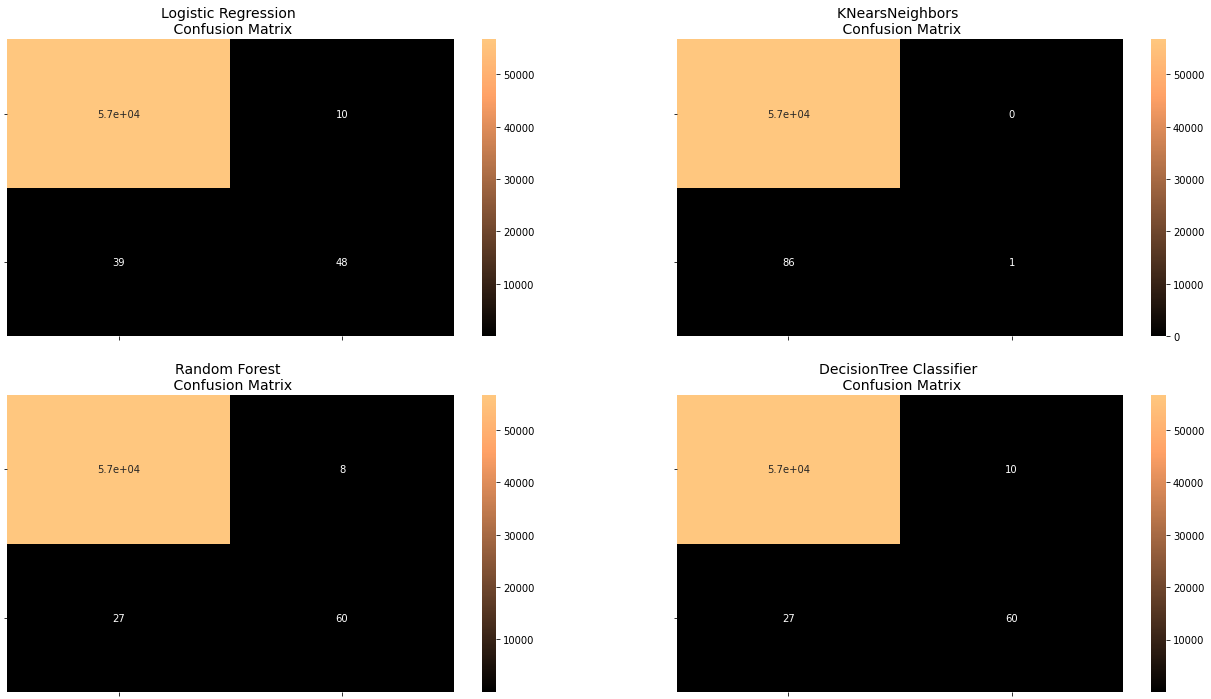

In [39]:
#Confusion Matrix Comparing Of All the Model
knn_cf = confusion_matrix(y_test, knn_pred)
dt_cf = confusion_matrix(y_test, dt_pred)
lr_cf = confusion_matrix(y_test, lr_pred)
rf_cf =confusion_matrix(y_test, rf_pred)



fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(knn_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(dt_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(lr_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)


sns.heatmap(rf_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)



plt.show()

In [40]:
#Classification Report Of All Models
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, knn_pred))

print('KNears Neighbors:')
print(classification_report(y_test, dt_pred))

print('Support Vector Classifier:')
print(classification_report(y_test, lr_pred))

print('Support Vector Classifier:')
print(classification_report(y_test, rf_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       1.00      0.01      0.02        87

    accuracy                           1.00     56746
   macro avg       1.00      0.51      0.51     56746
weighted avg       1.00      1.00      1.00     56746

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.86      0.69      0.76        87

    accuracy                           1.00     56746
   macro avg       0.93      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.83      0.55      0.66        87

    accuracy                           1.00     56746
   macro avg       0.91      0.78      0.83     56746
weighted